# Assignment 4a

## Logistic Regression

### A classification model that estimates an applicant’s probability of admission based on scores from two exams.

In [122]:
import numpy as np
data = np.genfromtxt('ex2data1.txt', delimiter = ",")
m = len(data[:,0])
y = np.zeros((m, 1))
y[:,0] = data[:, 2]
m = len(y)
X = np.ones((m,3))
X[:, 1:] = data[:, 0:2]

##### Visualizing the data

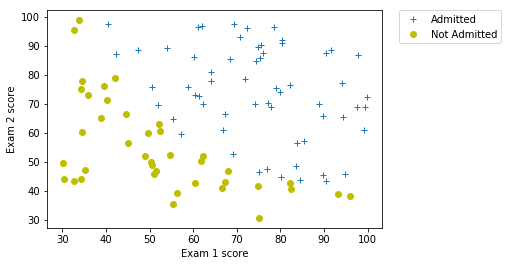

In [123]:
pos = []
neg = []
for i in range(0, m):
    if y[i] == 1:
        pos.append(i)
    else:
        neg.append(i)
import matplotlib.pyplot as plt
plt.plot(X[pos, 1], X[pos, 2], '+', label = "Admitted")
plt.plot(X[neg, 1], X[neg, 2], 'yo', label = "Not Admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Sigmoid function

In [124]:
def sigmoid(z):
    neg_z = np.negative(z)
    exp_z = np.exp(neg_z)
    den = np.add(1, exp_z)
    return np.reciprocal(den)

##### Cost function 

In [125]:
def cost():
    z = np.dot(X, theta)
    h = sigmoid(z)
    # if sigmoid function gives error uncomment the 2 statements below and comment the statement above
    #from scipy.special import expit
    #h = expit(z)
    t1 = -1 * y * np.log(h)
    t2 = (y - 1) * np.log(1 - h)
    sum_ = np.sum(t1 + t2)
    J = sum_/m 
    return J

##### Gradient function

In [126]:
# function to calculate gradient
def dif_cost():
    n = len(theta)
    grad = np.zeros((n, 1))
    z = np.dot(X, theta)
    h = sigmoid(z)
    # if sigmoid function gives error uncomment the 2 statements below and comment the statement above
    #from scipy.special import expit
    #h = expit(z)
    for j in range(0, n):
        x = np.zeros((m,1))
        x[:,0] = X[:,j]
        t = (h - y) * x
        sum_ = np.sum(t)
        grad[j, 0] = sum_ / m
    return grad    

##### Initialize theta values

In [127]:
theta = np.zeros((3, 1))

##### Train

In [128]:
no_iter = 300000
alpha = 0.00425
for i in range(1, no_iter):
    grad = dif_cost()
    theta = theta - alpha * grad

##### Theta values :

In [129]:
theta

array([[-25.56299656],
       [  0.20626618],
       [  0.20150353]])

###### Cost :

In [130]:
cost()

0.20843031693614494

##### Test
For a student with an Exam 1 score of 45 and an Exam 2 score of 85, probability of selection is

In [131]:
A = [1, 45, 85]
probability = np.dot(A, theta)
print(probability)

[ 0.84678197]


##### Visualizing the decision boundary

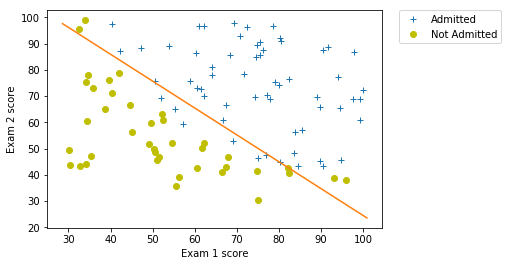

In [132]:
plot_x = [min(X[:,2])-2,  max(X[:,2])+2]
plot_y = (-1.0/theta[2,0]) * (np.multiply(theta[1,0],plot_x) + theta[0,0])
plt.plot(X[pos, 1], X[pos, 2], '+', label = "Admitted")
plt.plot(X[neg, 1], X[neg, 2], 'yo', label = "Not Admitted")
plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()